In [26]:
from vaiutils import path_consts, plot_images
from scipy.misc import imread, imresize
from glob import glob

In [2]:
import torch
import torch.nn as nn

In [3]:
for k,v in path_consts(['SampleImages', 'COCO']):
    exec(k+'=v')
DIR_DATA['SampleImages'] += '/images/fedal.jpg'
DIR_DATA['COCO'] += '/val2017/*.jpg'

In [35]:
def split_color(image):
    img_bw = np.linalg.norm(image, axis=-1, keepdims=True)
    img_color = image / np.maximum(img_bw, 1)
    img_color = (img_color - img_color.min()) * 255 / (img_color.max() - img_color.min())
    
    img_color = imresize(imresize(img_color, 0.9, 'nearest'), img_color.shape[:-1], 'nearest')
    return np.squeeze(img_bw)  / np.sqrt(3), img_color

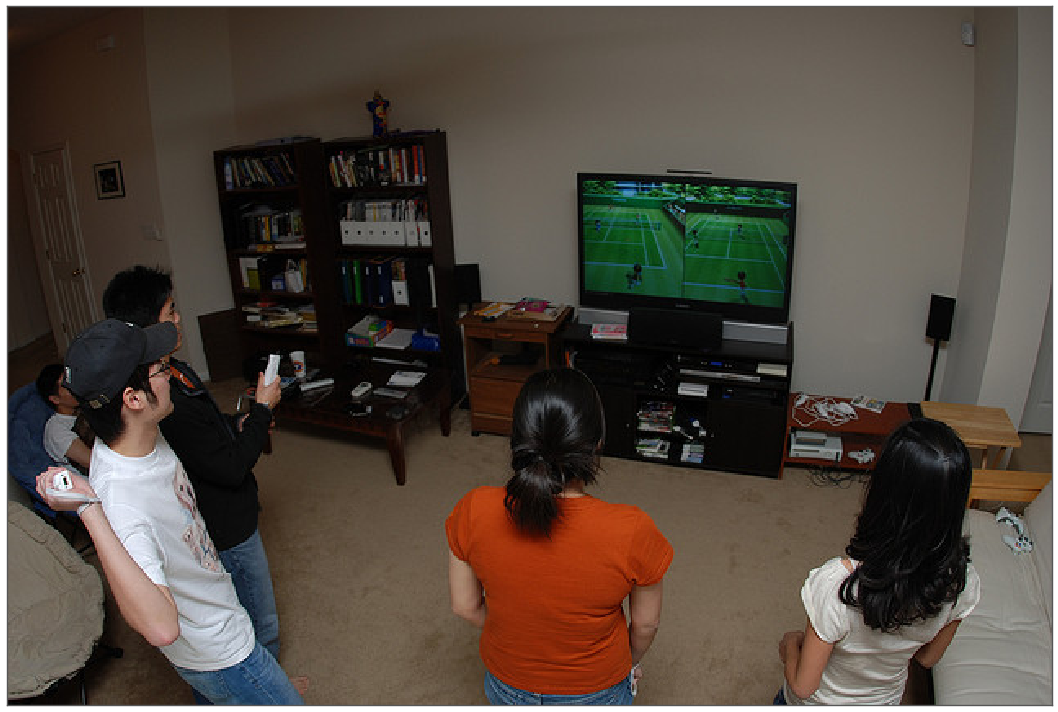

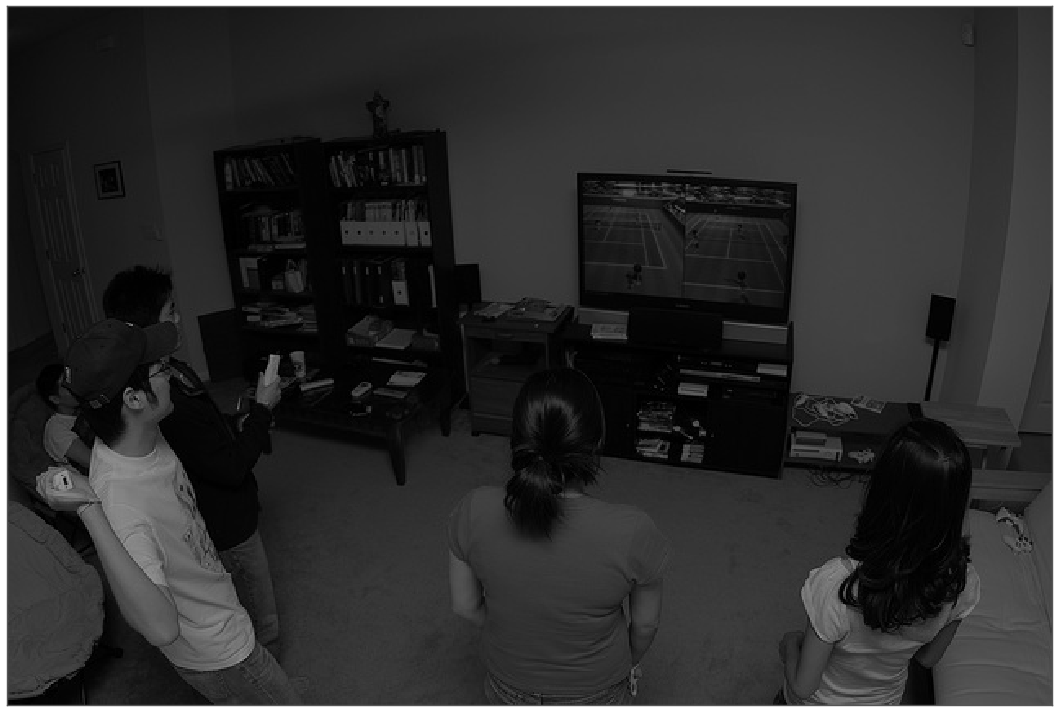

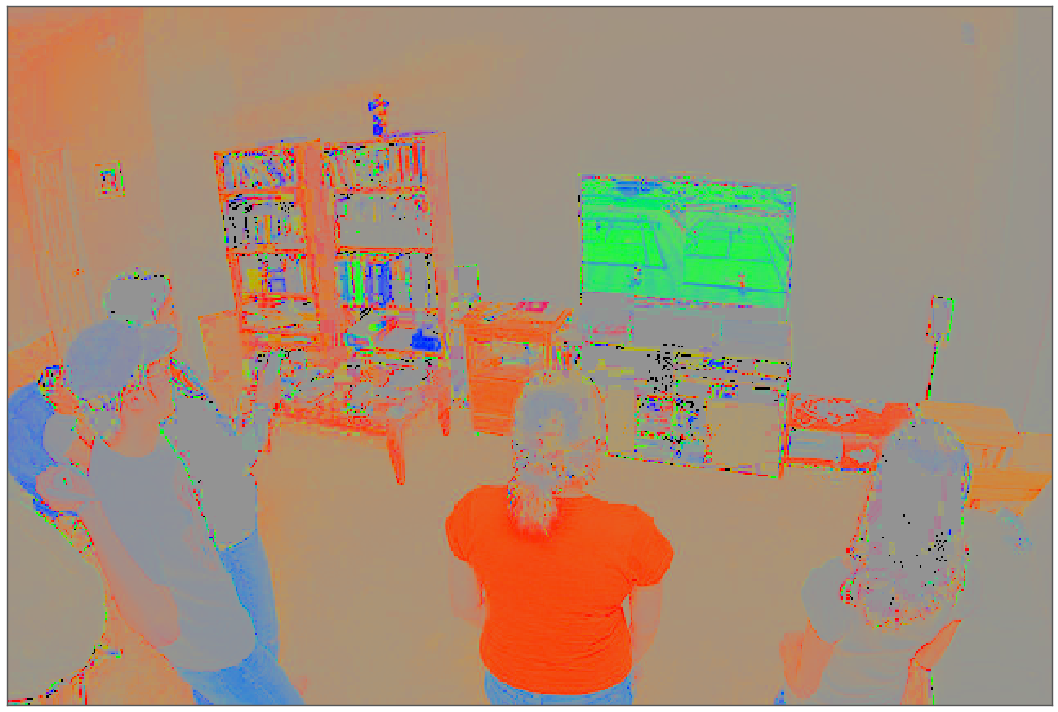

In [36]:
filenames = glob(DIR_DATA['COCO'])
img = imread(filenames[randint(len(filenames))])
img_bw, img_color = split_color(img)
plot_images([img])
plot_images([np.repeat(np.expand_dims(img_bw, -1), 3, -1) / np.sqrt(3)])
plot_images([img_color])

In [23]:
def get_edged(image, strength=0, edge_fn=nn.AvgPool2d(3, 1, 1)):
    img_edged = abs(edge_fn(torch.from_numpy(np.expand_dims(image, 0))).data.numpy()[0] - image * 10/9)

    img_edged[img_edged < strength] = 0

    img_edged = (img_edged - img_edged.min()) * 255 / (img_edged.max() - img_edged.min())

    return img_edged

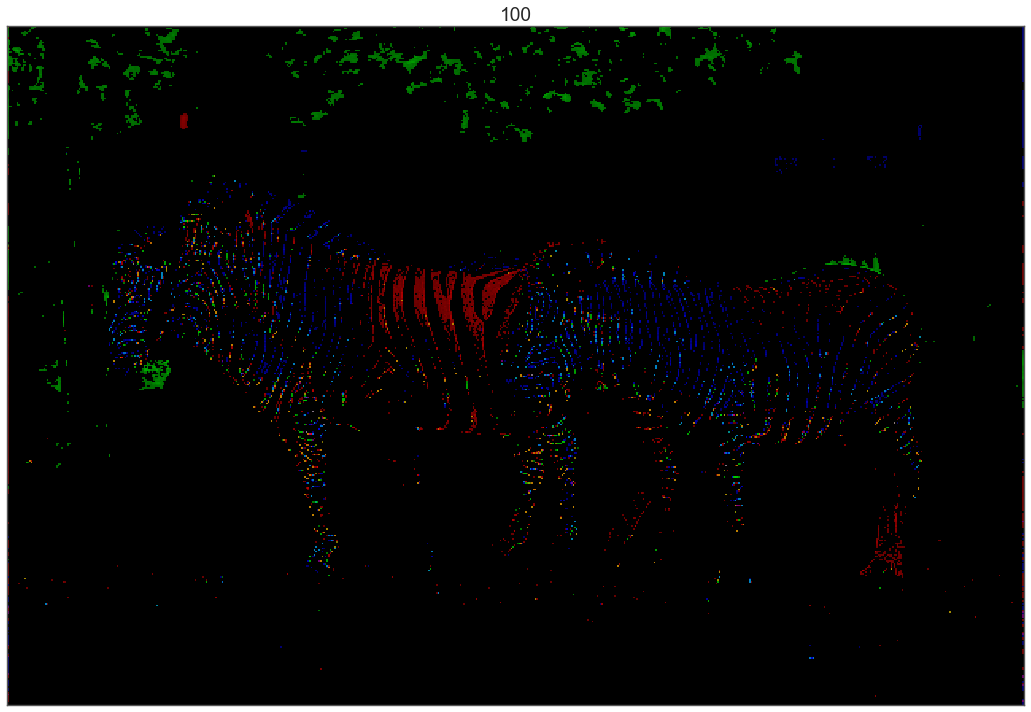

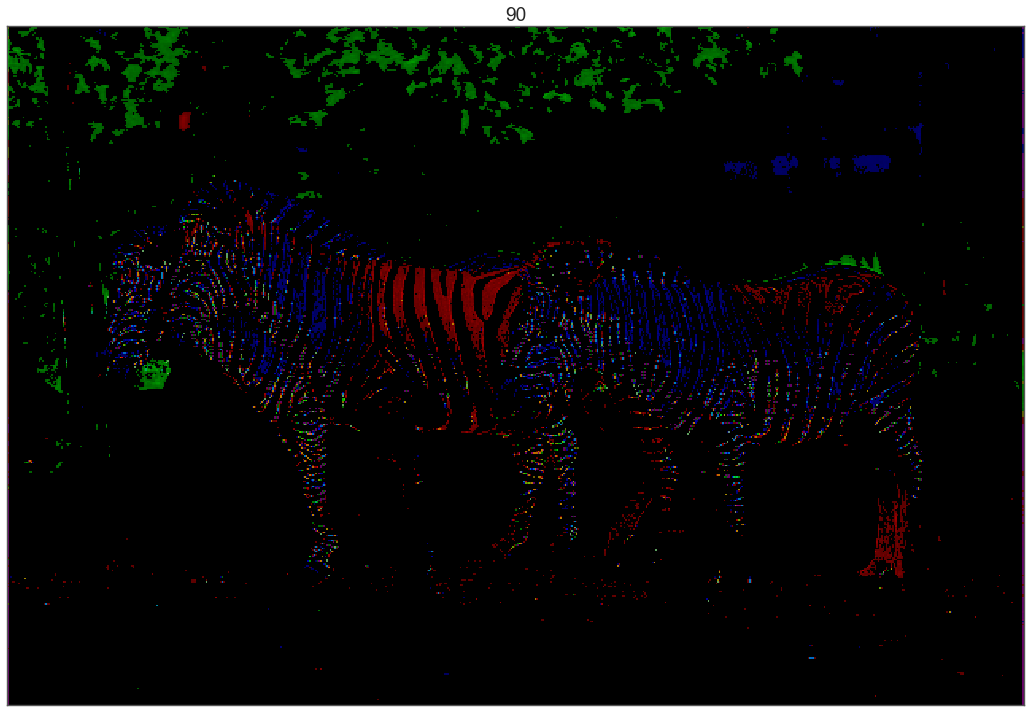

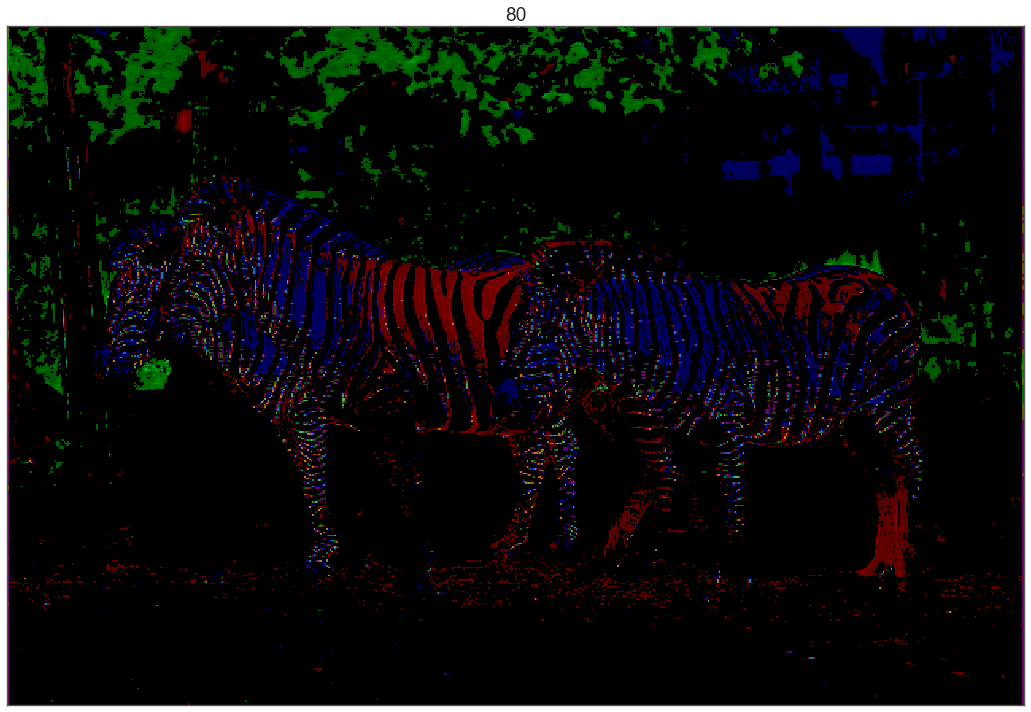

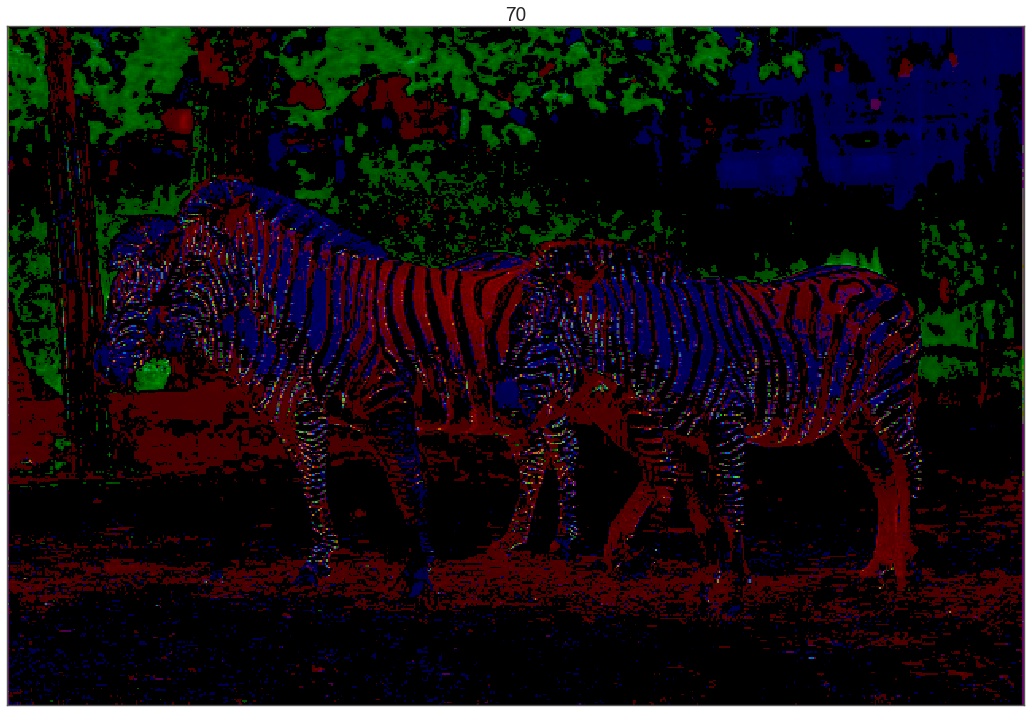

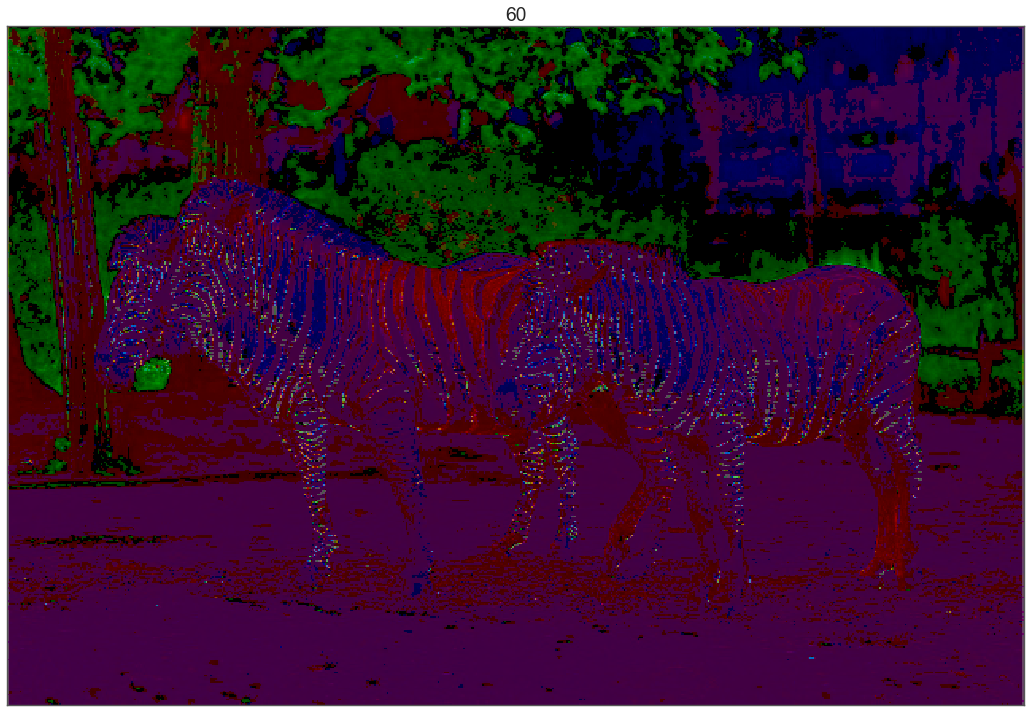

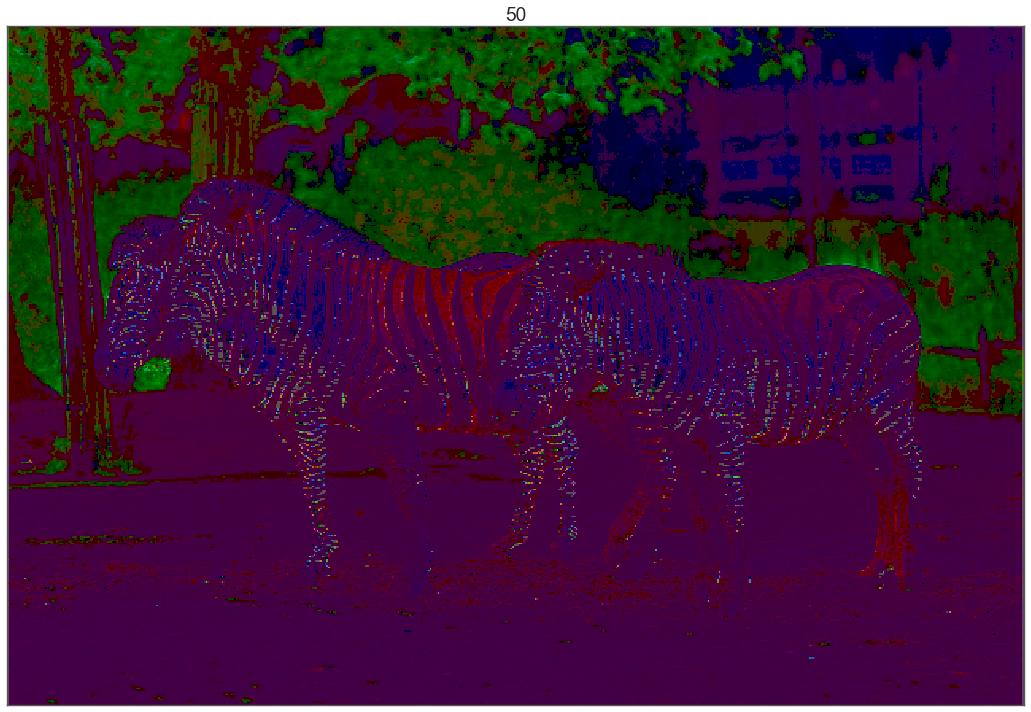

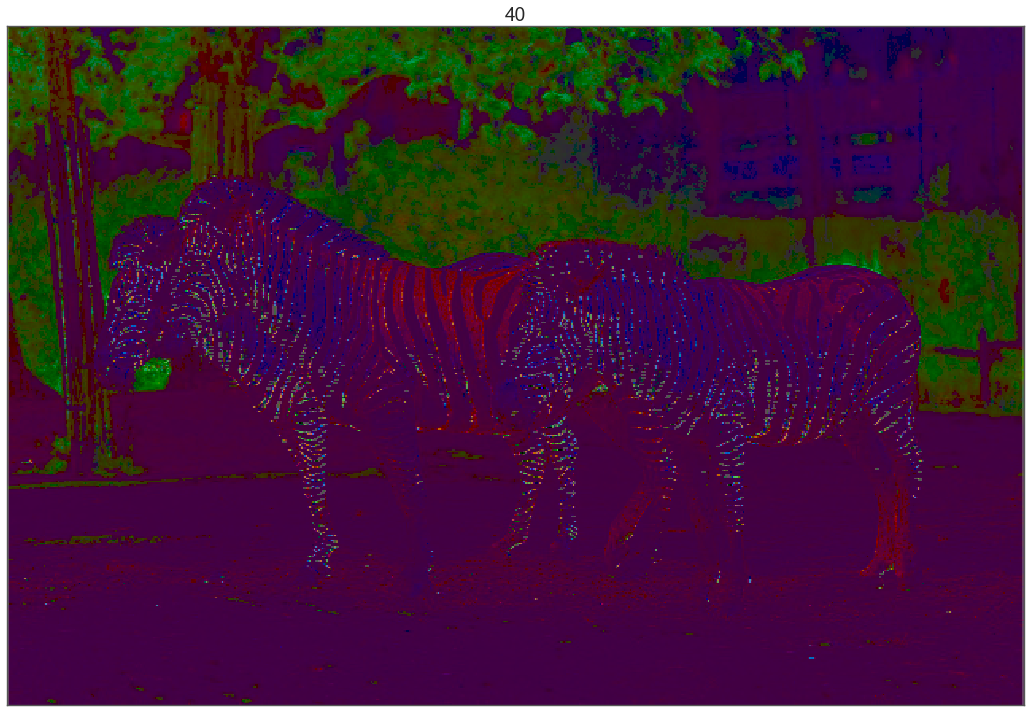

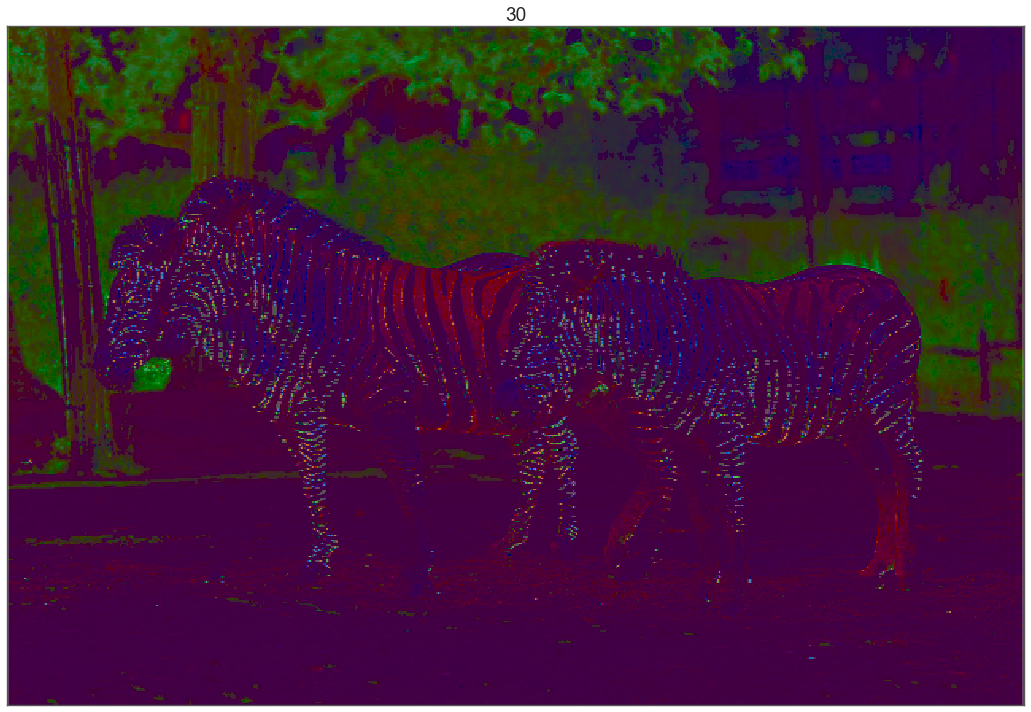

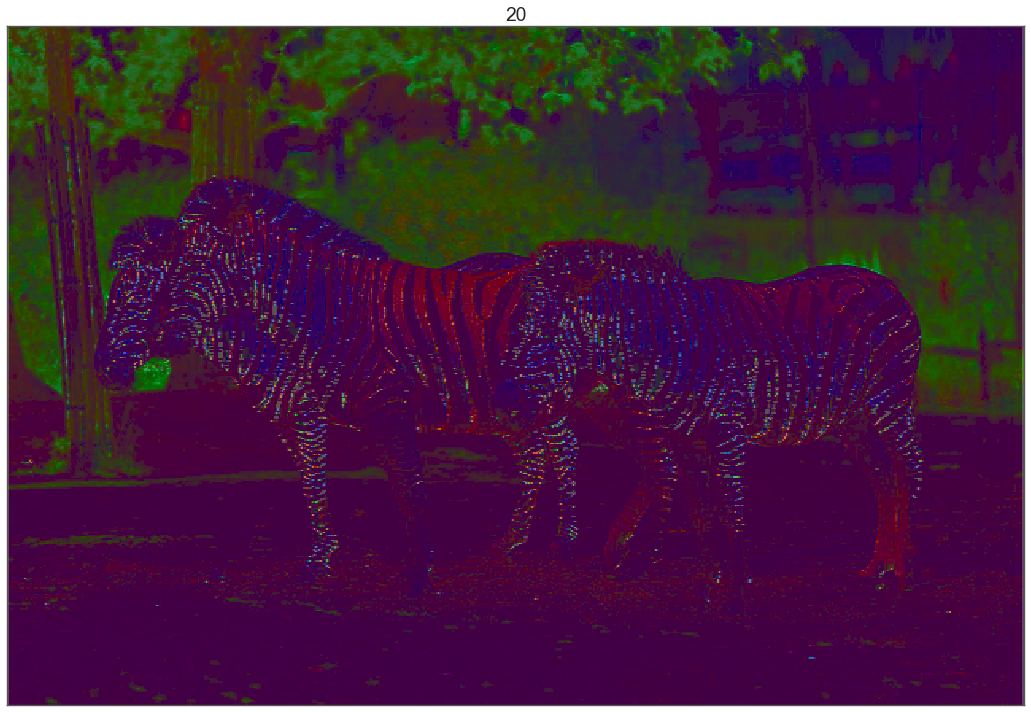

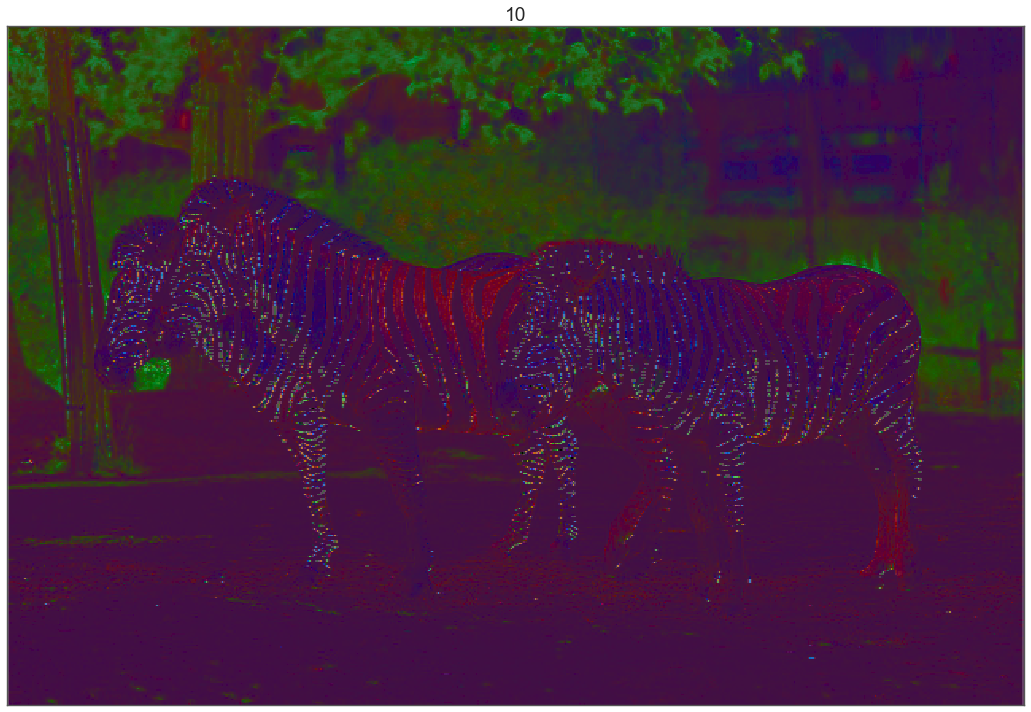

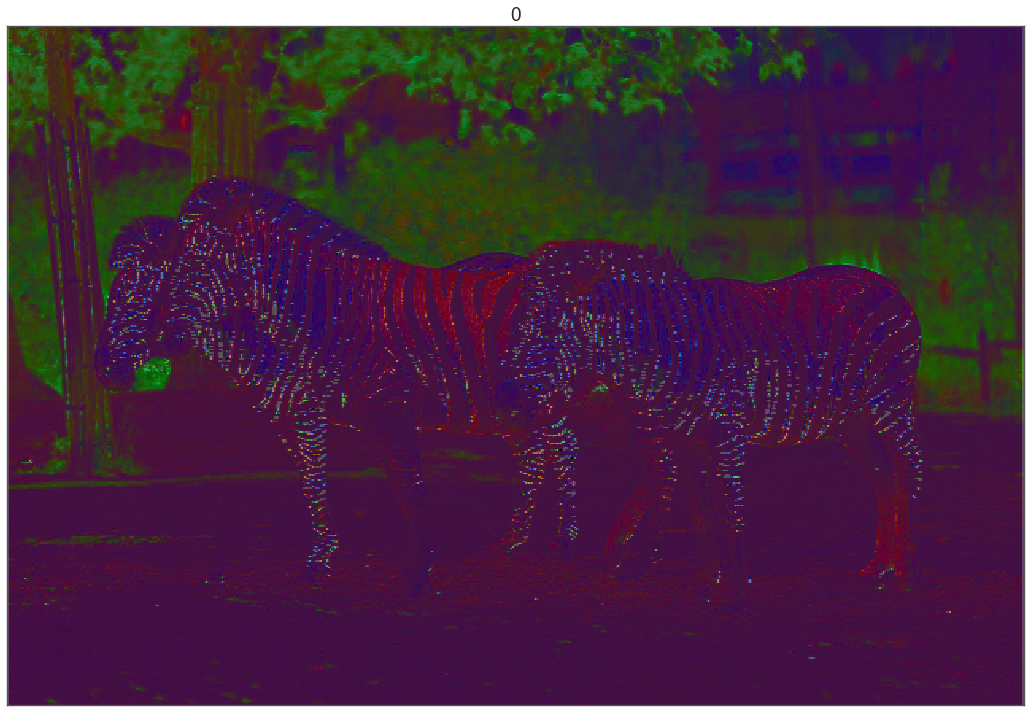

In [25]:
for i in range(100, -10, -10):
    plot_images([get_edged(img_color.astype(float), i)], i)

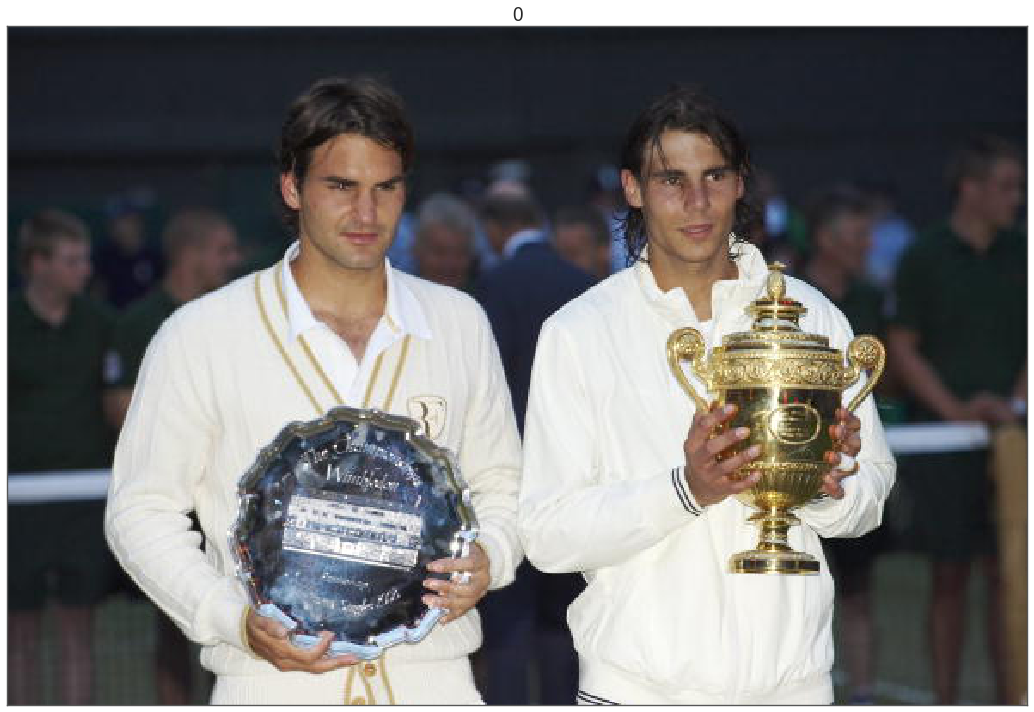

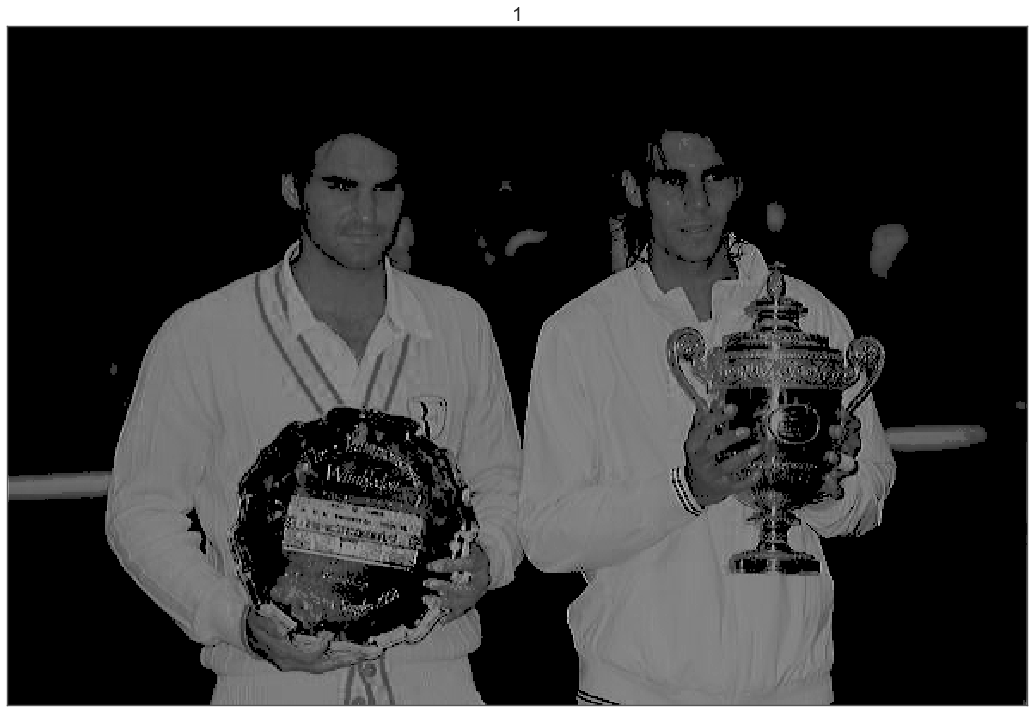

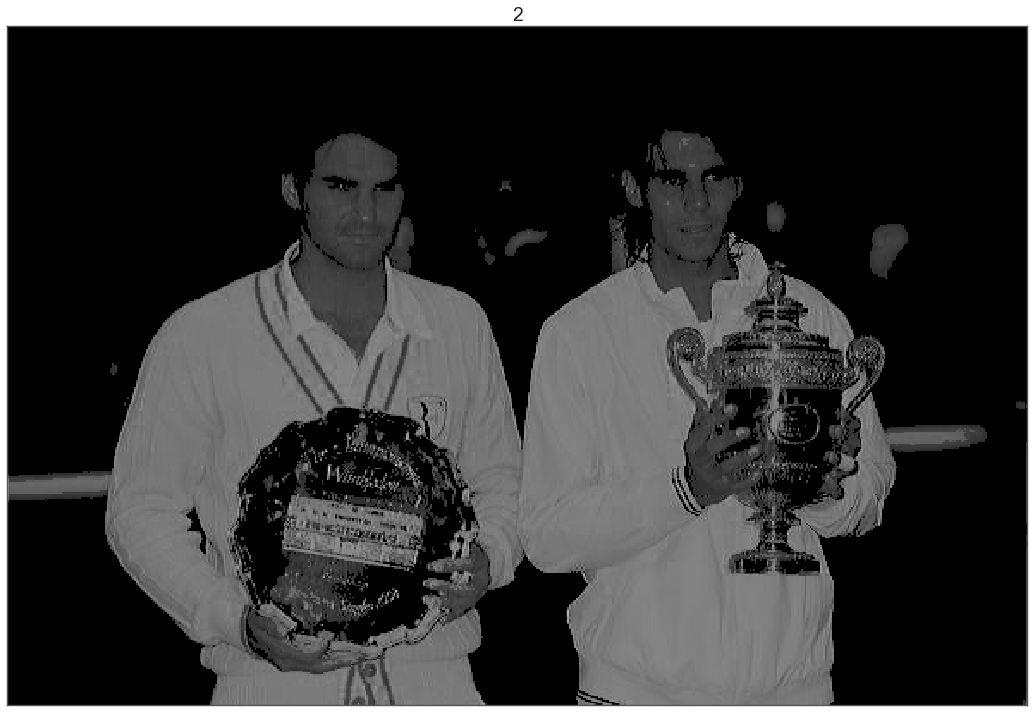

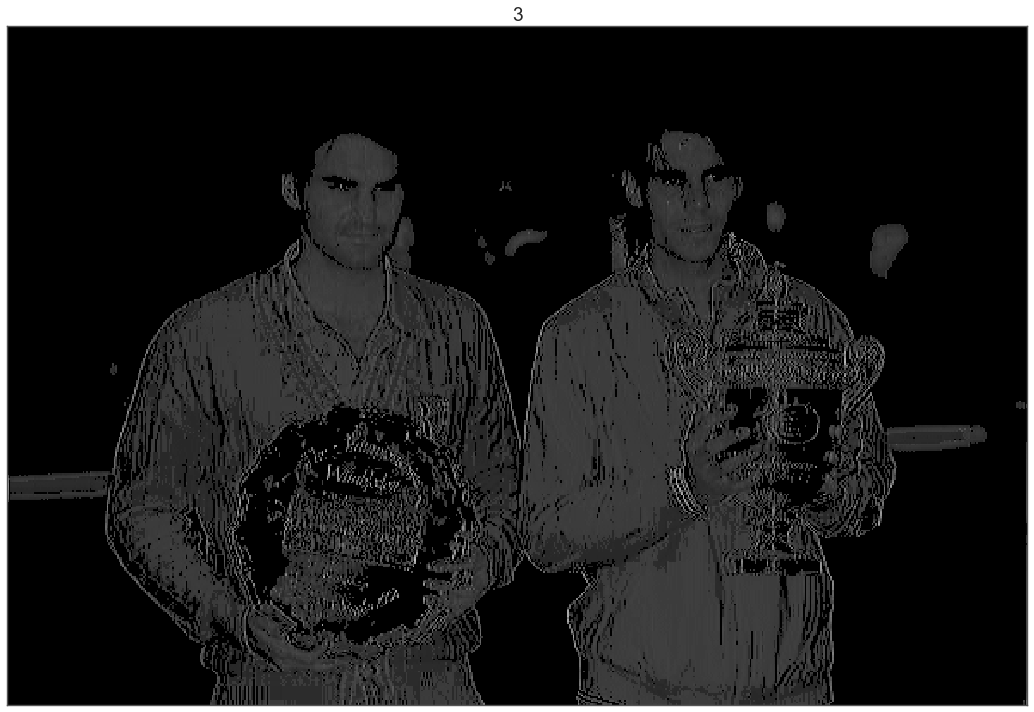

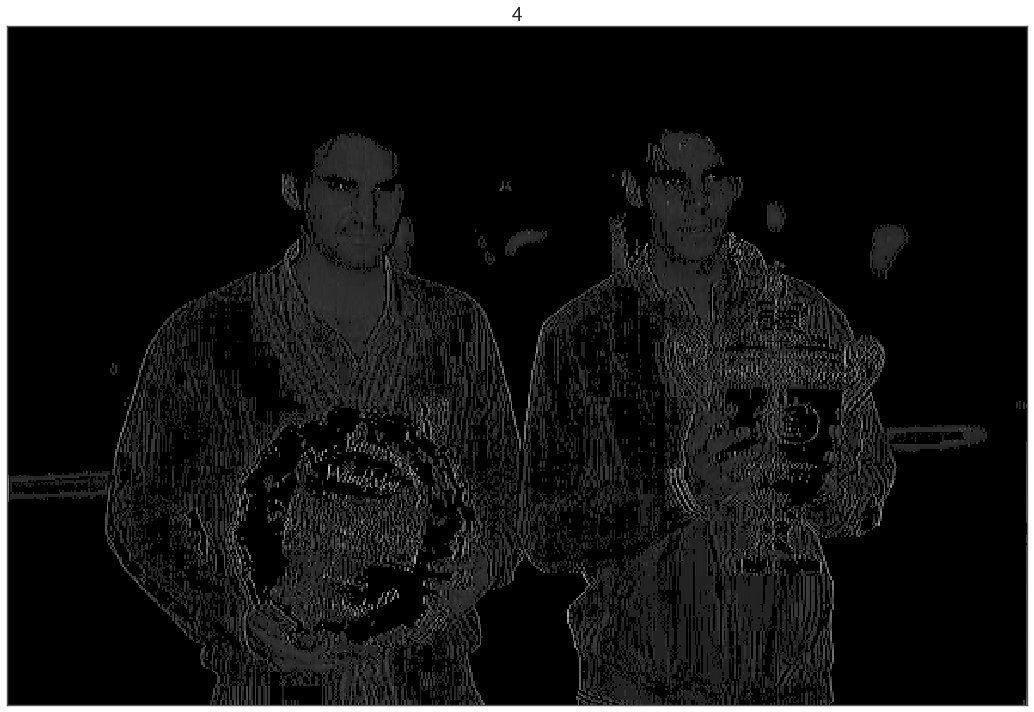

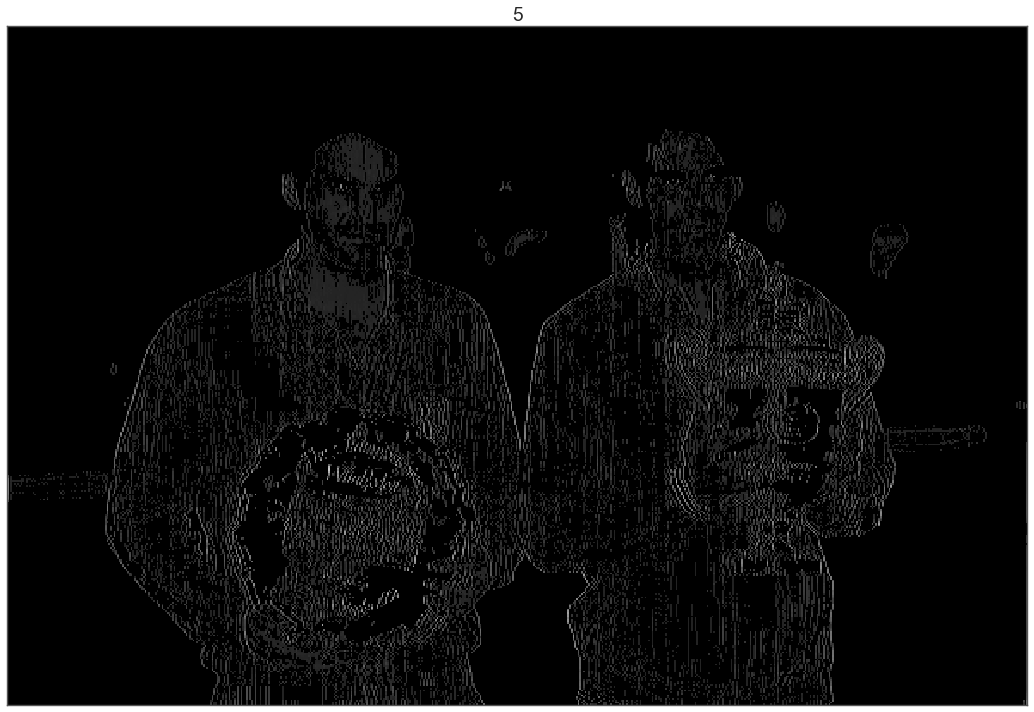

In [221]:
img_edged = img.astype('float')
plot_images([img_edged], 0)
for i in range(5):
    img_edged = get_edged(img_edged, 60)
    plot_images([split_color(img_edged)[0]], i+1)

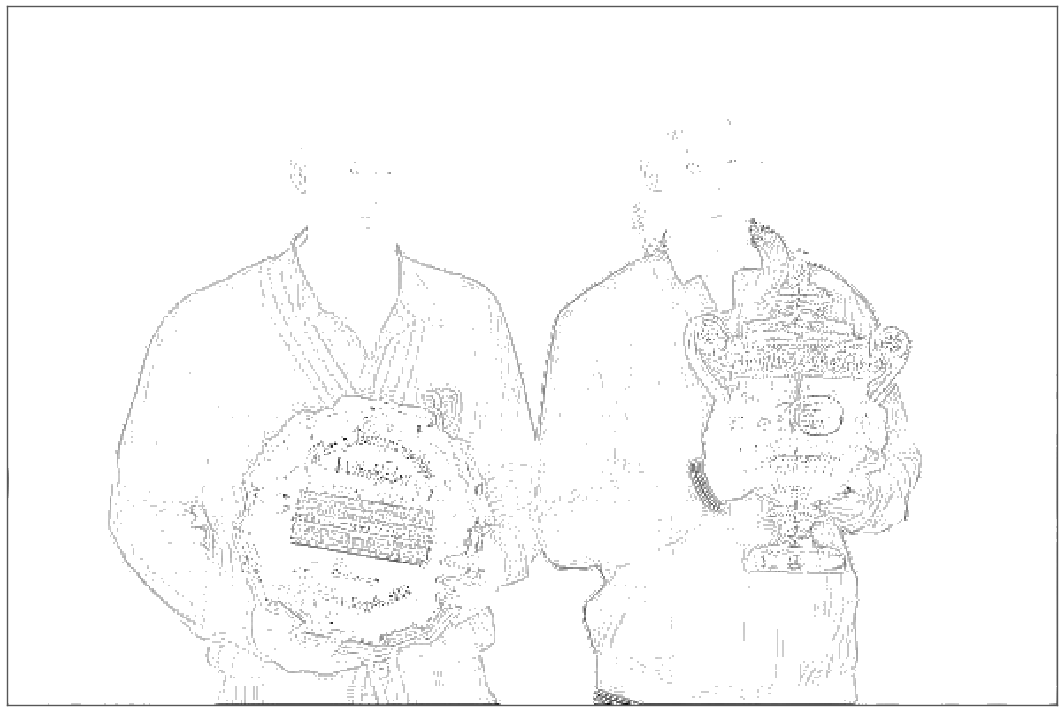

In [181]:
plot_images([255 - get_edged(img_bw, 30)])
#plot_images([join_color(255 - get_edged(img_bw, 30), img_color)])